In [29]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Load the dataset (assuming it's stored in a file)
data = pd.read_csv('heart.csv')


In [31]:
# Split features and target
X = data.drop('target', axis=1)
y = data['target']


In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Normalize feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Create and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)

In [35]:
# Evaluate model
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [36]:
# Display results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9853658536585366

Confusion Matrix:
[[102   0]
 [  3 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



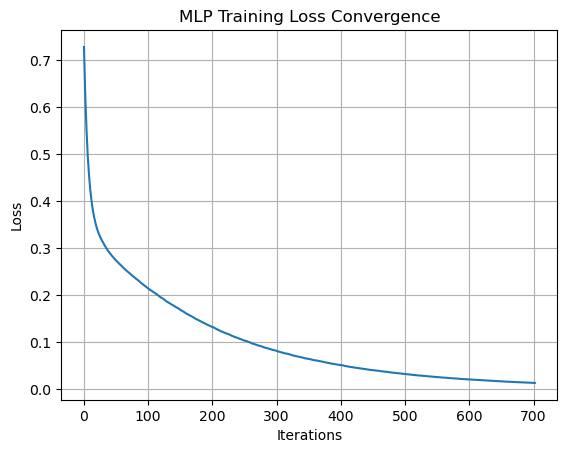

In [37]:
# Plot training loss curve
plt.plot(mlp.loss_curve_)
plt.title("MLP Training Loss Convergence")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()